<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/8D8uDf).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [25]:
import numpy as np
import pandas as pd

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [7]:
df = pd.read_csv('data/mlbootcamp5_train.csv', sep=';', index_col='id')
#df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', index_col='id')

Посмотрим не первые 5 записей.

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше.**

**<font color='red'>Варианты:</font>**
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин

** <font color='green'>Мой код</font> **

Определяем пол:
судя по средним значения роста и веса для каждого пола:<br> 1 - женщины<br>2 - мужчины

In [9]:
df.groupby('gender').mean()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,
1,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

#### Ответ: 45530 женщин и 24470 мужчин

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем чаще указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- женщины
- мужчины

** <font color='green'>Мой код</font> **

In [16]:
alcoshares = df.groupby('gender').apply(lambda x: x['alco'].value_counts(normalize=True)*100)
alcoshares

alco,0,1
gender,,
1,97.450033,2.549967
2,89.362485,10.637515


#### Ответ: мужчины чаще употребляют алкоголь

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

** <font color='green'>Мой код</font> **

In [23]:
alcoshares.iloc[1]/alcoshares.iloc[0]

alco
0    0.917008
1    4.171629
dtype: float64

#### Ответ: процент курящих среди мужчин больше, чем процент курящих среди женщин в <font color='red'>4</font> раза

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чем здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 5
- 10
- 15
- 20

** <font color='green'>Мой код</font> **

In [26]:
#добавляем matplotlib
import matplotlib
%matplotlib inline

Смотрим, в чем измеряется возраст, видимо, в днях.

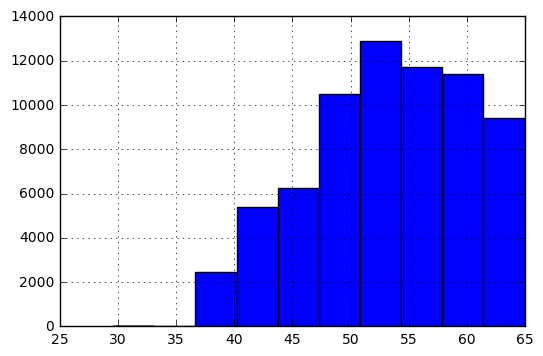

In [30]:
df.age.map(lambda x: x/365).hist()

In [37]:
smokeage = df.groupby('smoke')['age'].median()
np.round((smokeage[0]-smokeage[1])/30)

20.0

#### Ответ: медианные значения возраста курящих и некурящих отличаются на <font color='red'>20</font> месяцев

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='../../img/SCORE2007.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 65 лет. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180). 

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Посчитайте признак ``age_years`` – возраст в годах, округлив до целых. Для данного примера отберите людей от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.

Во сколько раз (округленно) отличаются доли больных в двух сегментах, описанных выше? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

** <font color='green'>Мой код</font> **

In [84]:
df['age_years'] = np.round(df['age']/365).apply(int)
def recodeAp(x):
    if x<=120:
        return 1
    elif (x>160) & (x<=180):
        return 2
    else:
        return -1
df['ap_hi_code'] = df['ap_hi'].map(recodeAp)

In [123]:
score = df[(df['age_years']>60) & (df['age_years']<=65) & (df['smoke']==1) & (df['gender']==2) & (df['cholesterol']==3) \
           & (df['ap_hi_code']!=-1)] #\
        #.groupby('ap_hi_code')['cardio']\
        #.value_counts(normalize=True)\
#score = score[score['cardio']==1]
#score[score['ap_hi_code']==2] / score[score['ap_hi_code']]
score = pd.crosstab(score['ap_hi_code'], score['cardio'], normalize=True)
score

cardio,0,1
ap_hi_code,,
1,0.244444,0.622222
2,0.000000,0.133333


In [118]:
print(score.loc[1,2])
print(score.loc[1,1])

0.048
0.224


In [125]:
np.round(score.loc[1,1] / score.loc[2,1])

5.0

#### Ответ: доли больных в двух сегментах отличаются в <font color='red'>5</font> раз
<hr/>

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке лежит в пределах нормы
- У женщин в среднем BMI выше, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

** <font color='green'>Мой код</font> **

In [126]:
df['bmi'] = df['weight']/((df['height']/100)**2)

In [134]:
print('Медианный bmi по выборке =',df['bmi'].median())

Медианный bmi по выборке = 26.374068120774975


In [146]:
df.groupby('gender')['bmi'].median()

gender
1    26.709402
2    25.910684
Name: bmi, dtype: float64

In [147]:
df.groupby('cardio')['bmi'].median()

cardio
0    25.476660
1    27.471384
Name: bmi, dtype: float64

In [148]:
df[(df['cardio']==0) & (df['alco']==0)].groupby('gender')['bmi'].median()

gender
1    25.654372
2    25.102391
Name: bmi, dtype: float64

#### Ответ:
- <font color='red'>Медианный BMI по выборке лежит в пределах нормы</font>
- <font color='green'>У женщин в среднем BMI выше, чем у мужчин</font>
- <font color='red'>У здоровых в среднем BMI выше, чем у больных</font>
- <font color='green'>В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин</font>
<hr/>

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления выше верхнего. 
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

** <font color='green'>Мой код</font> **

In [185]:
bd = df[(df.ap_lo>df.ap_hi) | 
        (df.weight<df.weight.quantile(0.025)) | 
        (df.weight>df.weight.quantile(0.975)) | 
        (df.height<df.height.quantile(0.025)) | 
        (df.height>df.height.quantile(0.975))].shape[0]

In [190]:
print('Доля "грязных" данных:',np.round(bd/df.shape[0]*100))

Доля "грязных" данных: 10.0


#### Ответ: Доля "грязных" данных: <font color='red'>10%</font>
<hr/>